#**Q1.   Problem   Statement: Data   Pre-Processing**

 (Categorical Data)You are given a dataset –“hotel_bookings.csv.”The dataset has a high number of null and  elements that need to be cleansed;  Your job is to create a separate DataFrame with only categorical columns and  perform the  following operations:

1.Find the number of null values in each column of the new DataFrame

2.Replace the null values with mode

3.In the "hotel"column, replace the hotel names with "0" and "1" based on the condition that –if,"hotel" = "city_hotel",then "hotel"= "1";  else, "0"

4.Using the label encoder, assign a unique country code to each country

5.Using onehot encoder, encode the month column

  

In [49]:

import pandas as pd
import numpy as np


df = pd.read_csv("/content/sample_data/hotel_bookings.csv")
np.random.seed(0)

In [50]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [51]:
df =df.drop(['company','agent'],  axis = 1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [52]:
hotel_df = df.select_dtypes(include=['object']).copy()
hotel_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [53]:
hotel_df.isnull().sum()

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64

In [54]:
hotel_df = hotel_df.fillna(hotel_df['country'].value_counts().index[0])
print("After replacing null values with mode:")
print(hotel_df.isnull().sum())

After replacing null values with mode:
hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


In [55]:
hotel_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [56]:
hotel_df1 =hotel_df.copy()
hotel_df1['hotel'] = np.where(hotel_df1['hotel'].str.contains('City Hotel'), 1, 0)

hotel_df1.sample(10)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
5627,0,May,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-05-13
119322,1,August,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-03
75310,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,2015-07-02
90032,1,May,BB,MAR,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2016-06-01
75368,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,2015-07-02
51740,1,May,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,2016-01-18
115665,1,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-07-09
118740,1,August,HB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-08-25
101671,1,November,BB,CHE,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-11-16
108262,1,March,BB,BEL,Offline TA/TO,TA/TO,A,D,No Deposit,Transient,Check-Out,2017-03-25


In [57]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
original_data = np.random.exponential(size = 1000)
df2= pd.DataFrame(original_data)
df2.head()

,0
0,0.152258
1,0.035311
2,2.507024
3,0.371154
4,0.475061


<ipython-input-59-719adf43d095>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
<ipython-input-59-719adf43d095>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

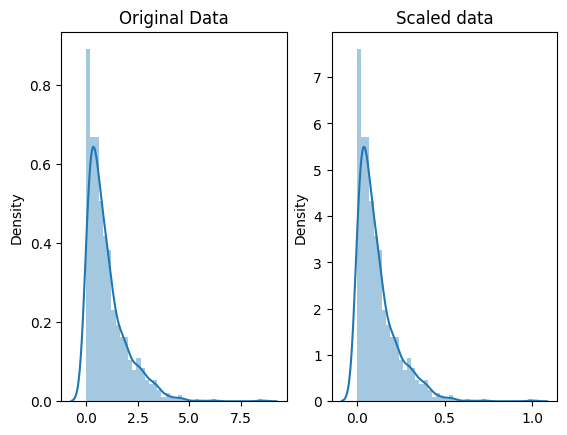

In [59]:
scaled_data = minmax_scaling(df2, columns = [0])
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [60]:
# normalize the exponential data with preprocessing
from scipy import stats
from sklearn import preprocessing
normalized_data = preprocessing.normalize(df2)

<ipython-input-61-25e23f7a5900>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2[0], ax=ax[0])
<ipython-input-61-25e23f7a5900>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data, ax=ax[1])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Datas

Text(0.5, 1.0, 'Normalized data')

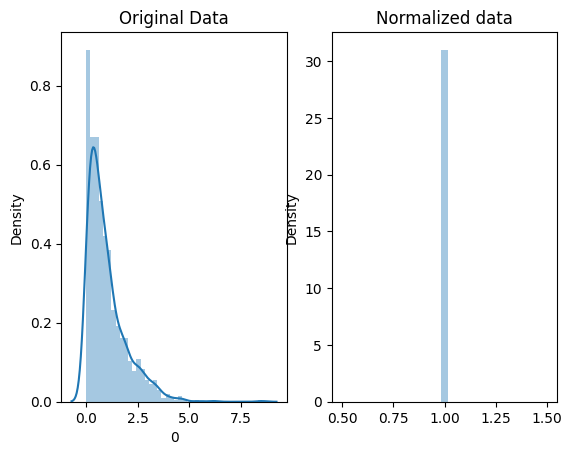

In [61]:
# normalize the exponential data
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df2[0], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")